In [1]:
import cv2 as cv
import numpy as np
import os
from matplotlib import pyplot as plt


def matching(item_no, output_image_path, thresh = 0.8, scales = None):
    # Define the paths for the main image and the template
    main_image_path = '1.jpg'
    item_image_path = f'items_list/item{item_no}.jpg'  # Assuming items are named as item1.png, item2.png, etc.
    
    # Load the main image and convert it to grayscale
    img_rgb = cv.imread(main_image_path)
    assert img_rgb is not None, "Main image could not be read, check the path."

    # Load the template (item) image
    template = cv.imread(item_image_path, cv.IMREAD_UNCHANGED)
    assert template is not None, f"Item image 'item{item_no}.jpg' could not be read, check the path."
    
    # Create a mask using thresholding to focus on non-white areas
    #_, mask = cv.threshold(gray_item, 220, 255, cv.THRESH_BINARY_INV)
    mask = np.any(template <= 250, axis=2).astype(np.uint8) * 255


    # Find the bounding box of the non-zero mask region
    non_zero_y, non_zero_x = np.nonzero(mask)
    top_left_y, bottom_right_y = np.min(non_zero_y), np.max(non_zero_y)
    top_left_x, bottom_right_x = np.min(non_zero_x), np.max(non_zero_x)

    # Crop the template and the mask to this bounding box
    cropped_template = template[top_left_y:bottom_right_y + 1, top_left_x:bottom_right_x + 1]
    cropped_mask = mask[top_left_y:bottom_right_y + 1, top_left_x:bottom_right_x + 1]

    # Define the scales to search through
    if scales is None:
        scales = np.arange(0.5, 2.01, 0.01)

    # Iterate through each scale and find all matches
    for scale in scales:
        # Resize the cropped template and mask according to the current scale
        scaled_template = cv.resize(cropped_template, (0, 0), fx=scale, fy=scale, interpolation=cv.INTER_LINEAR)
        scaled_mask = cv.resize(cropped_mask, (0, 0), fx=scale, fy=scale, interpolation=cv.INTER_NEAREST)

        # Perform template matching with the scaled template and mask
        res = cv.matchTemplate(img_rgb, scaled_template, cv.TM_CCOEFF_NORMED, mask=scaled_mask)
        threshold = thresh  # Adjust this threshold as needed for accuracy
        loc = np.where(res >= threshold)
    
        # Draw rectangles around detected regions
        for pt in zip(*loc[::-1]):
            cv.rectangle(img_rgb, pt, (pt[0] + scaled_template.shape[1], pt[1] + scaled_template.shape[0]), (0, 0, 255), 2)
    
    # Save the result image with highlighted matches
    output_image_path = "find/" + output_image_path + ".jpg"
    cv.imwrite(output_image_path, img_rgb)
    print(f"Result for item {item_no} saved to {output_image_path}")

    plt.imshow(cropped_mask, cmap='gray')
    plt.title(f'Mask for Item {item_no}')
    plt.axis('off')  # Hide the axis
    plt.show()


Result for item 1 saved to find/find_1.jpg


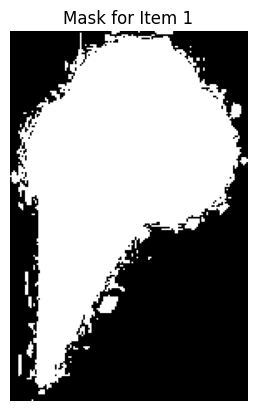

Result for item 2 saved to find/find_2.jpg


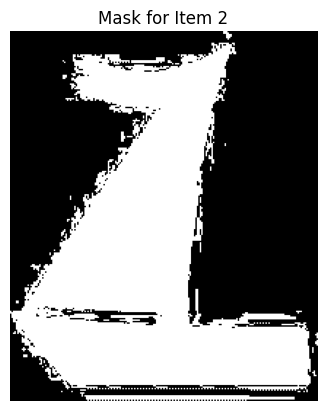

Result for item 3 saved to find/find_3.jpg


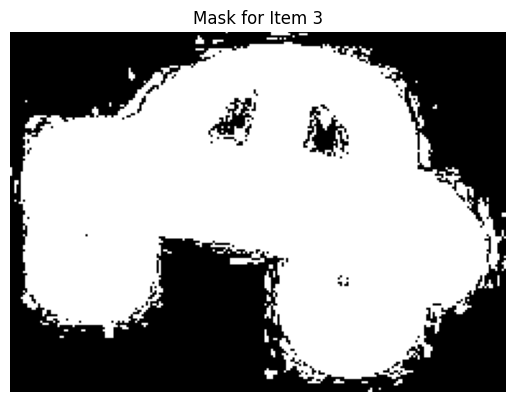

Result for item 4 saved to find/find_4.jpg


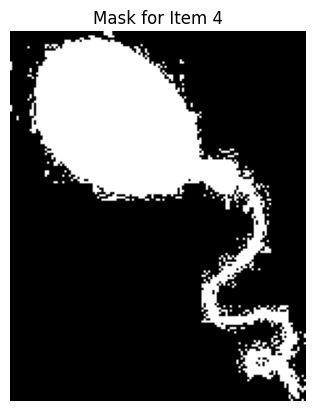

Result for item 5 saved to find/find_5.jpg


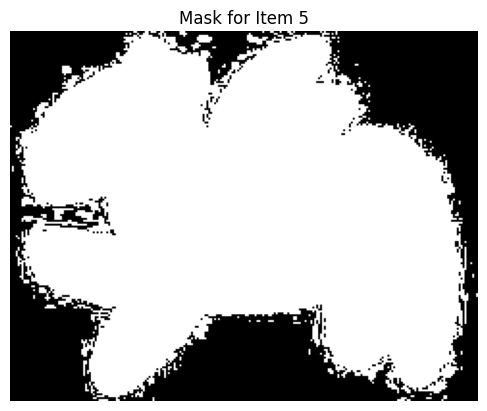

Result for item 6 saved to find/find_6.jpg


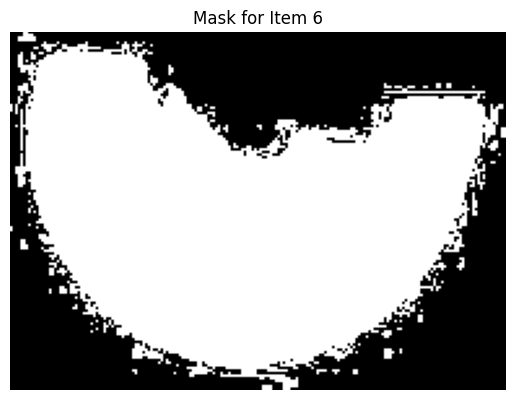

Result for item 7 saved to find/find_7.jpg


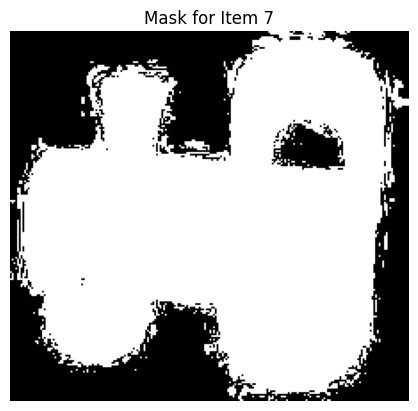

Result for item 8 saved to find/find_8.jpg


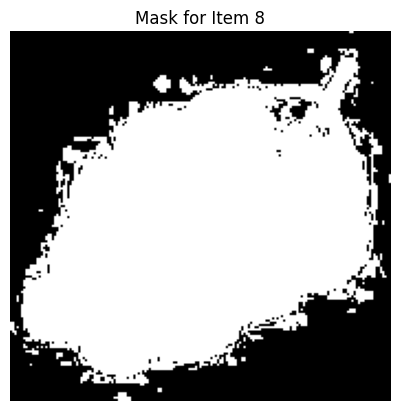

Result for item 9 saved to find/find_9.jpg


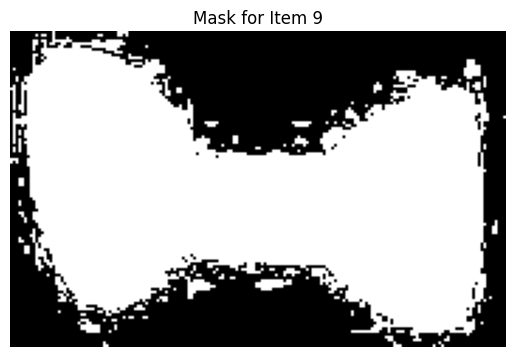

Result for item 10 saved to find/find_10.jpg


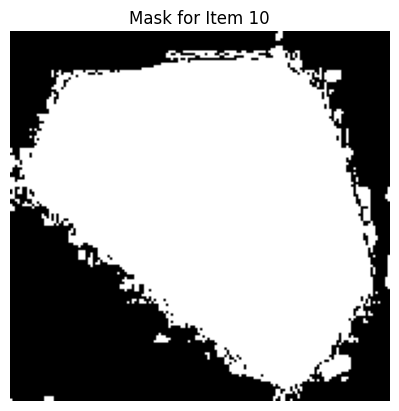

Result for item 11 saved to find/find_11.jpg


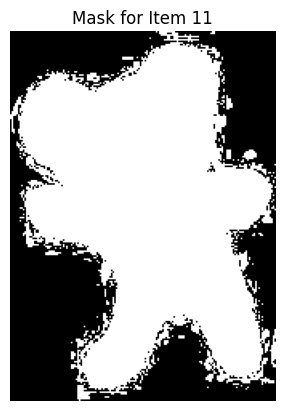

Result for item 12 saved to find/find_12.jpg


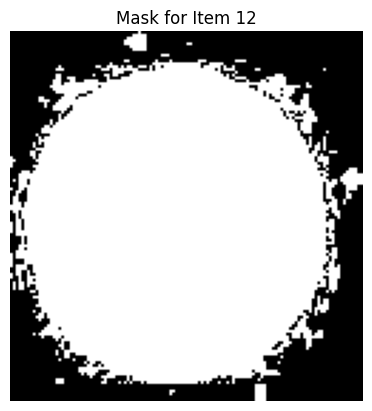

Result for item 13 saved to find/find_13.jpg


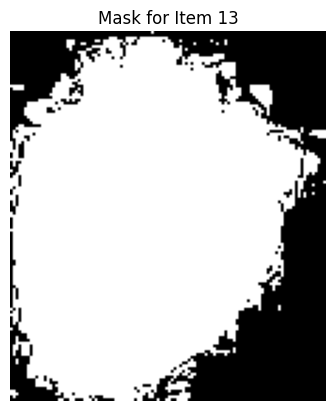

Result for item 14 saved to find/find_14.jpg


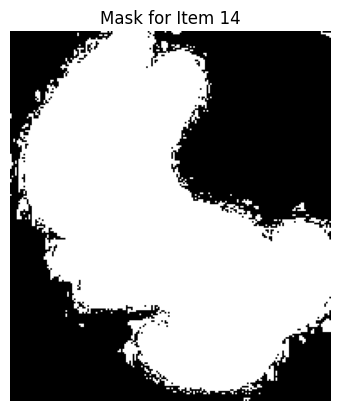

Result for item 15 saved to find/find_15.jpg


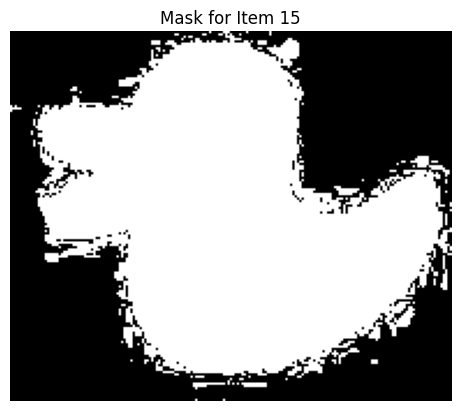

In [2]:
for i in range (1,16):
    matching(i, f'find_{i}')

Result for item 1 saved to find/find_thresh0.6_1.jpg


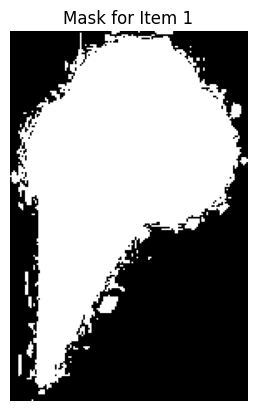

Result for item 2 saved to find/find_thresh0.6_2.jpg


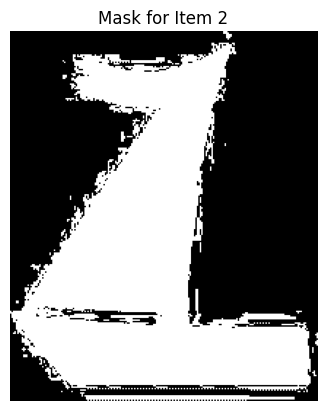

Result for item 3 saved to find/find_thresh0.6_3.jpg


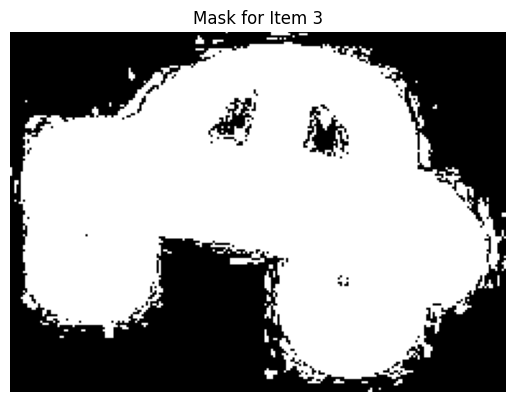

Result for item 4 saved to find/find_thresh0.6_4.jpg


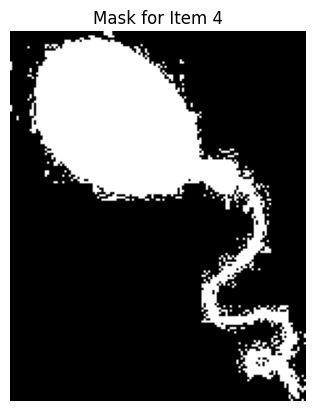

Result for item 5 saved to find/find_thresh0.6_5.jpg


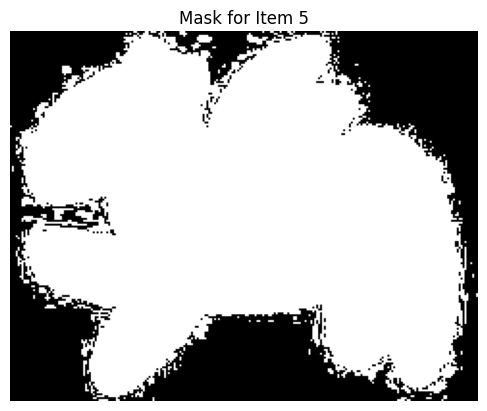

Result for item 6 saved to find/find_thresh0.6_6.jpg


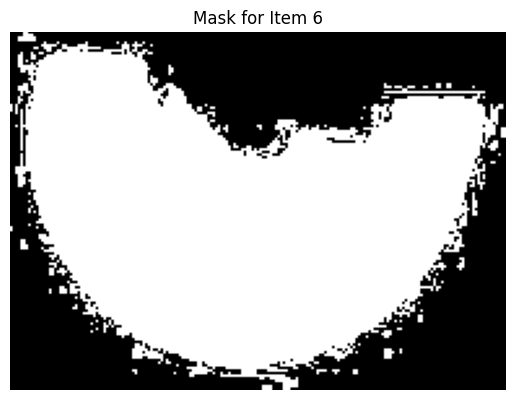

Result for item 7 saved to find/find_thresh0.6_7.jpg


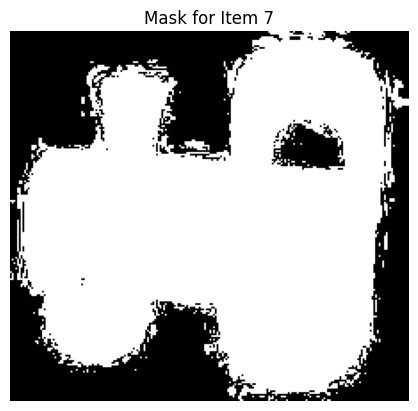

Result for item 8 saved to find/find_thresh0.6_8.jpg


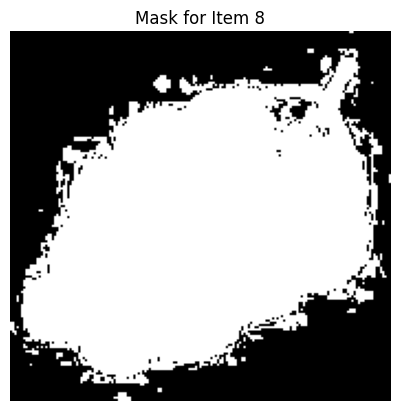

Result for item 9 saved to find/find_thresh0.6_9.jpg


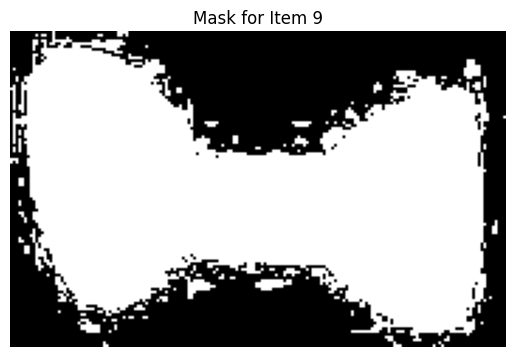

Result for item 10 saved to find/find_thresh0.6_10.jpg


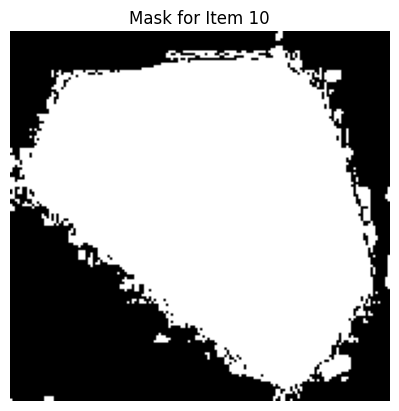

Result for item 11 saved to find/find_thresh0.6_11.jpg


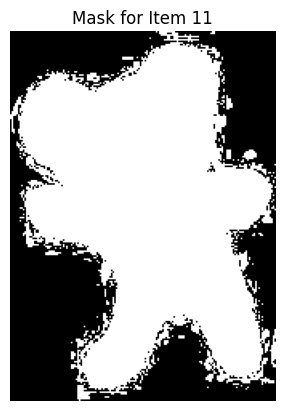

Result for item 12 saved to find/find_thresh0.6_12.jpg


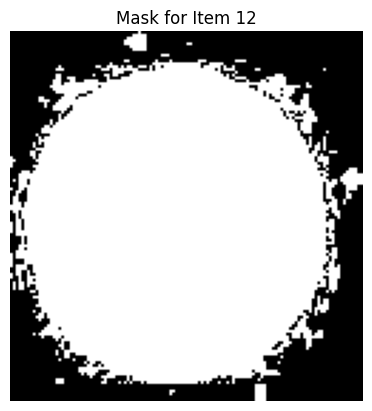

Result for item 13 saved to find/find_thresh0.6_13.jpg


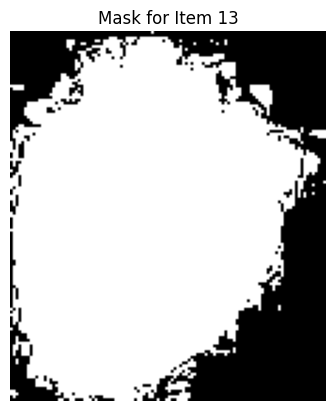

Result for item 14 saved to find/find_thresh0.6_14.jpg


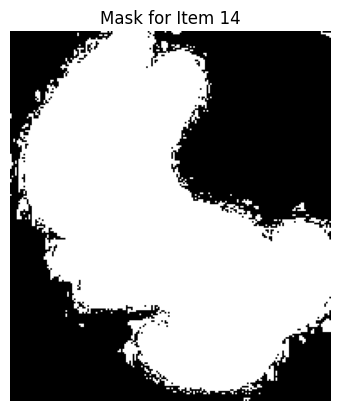

Result for item 15 saved to find/find_thresh0.6_15.jpg


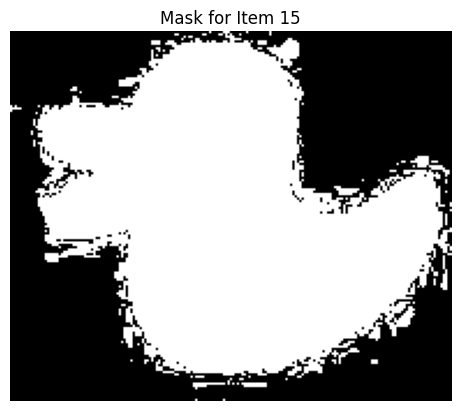

In [3]:
for i in range (1,16):
    matching(i, f'find_thresh0.6_{i}', thresh= 0.6)

# Found 1,3,5,6,7,13,14

Now find 2,4,8,9,10,11,12,15

Result for item 2 saved to find/find_thresh0.6_range0.1_4.02.jpg


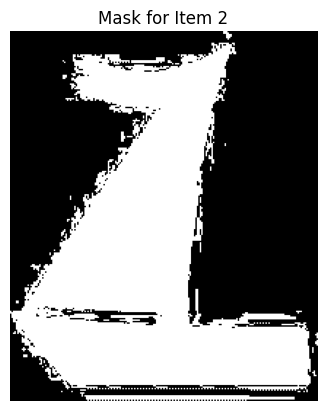

Result for item 4 saved to find/find_thresh0.6_range0.1_4.04.jpg


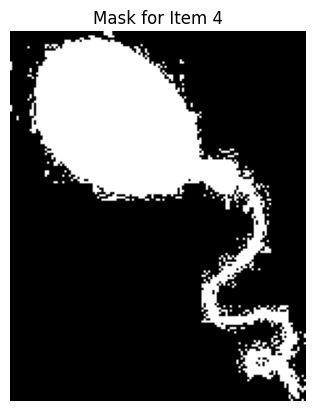

Result for item 8 saved to find/find_thresh0.6_range0.1_4.08.jpg


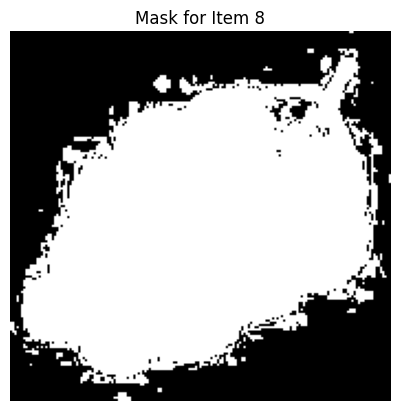

Result for item 9 saved to find/find_thresh0.6_range0.1_4.09.jpg


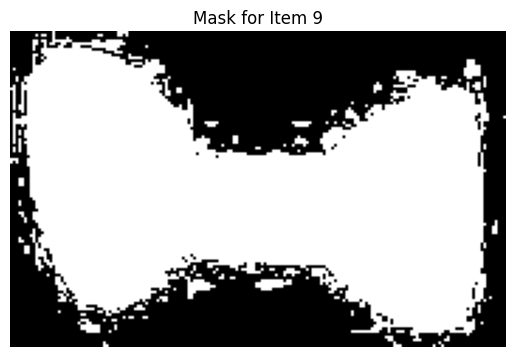

Result for item 10 saved to find/find_thresh0.6_range0.1_4.010.jpg


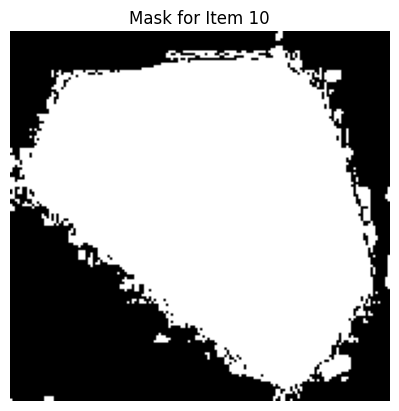

Result for item 11 saved to find/find_thresh0.6_range0.1_4.011.jpg


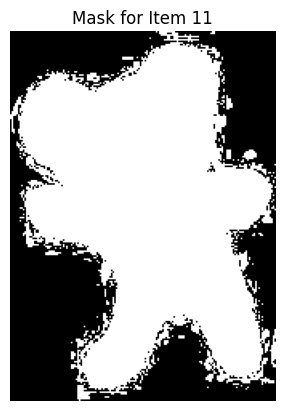

Result for item 12 saved to find/find_thresh0.6_range0.1_4.012.jpg


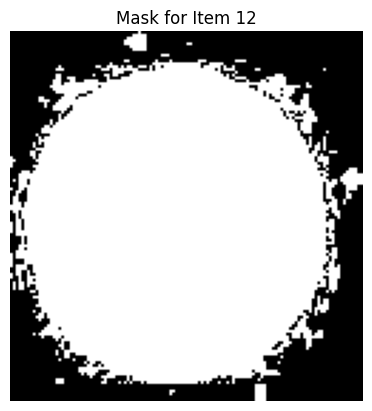

Result for item 15 saved to find/find_thresh0.6_range0.1_4.015.jpg


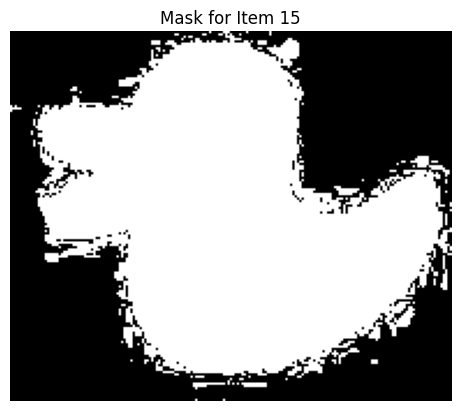

In [6]:
for i in [2,4,8,9,10,11,12,15]:
    matching(i, f'find_thresh0.6_range0.1_4.0{i}', thresh= 0.6, scales= np.arange(0.1, 3.1, 0.01))

# Found 9, thanks to shrinking the scaling size (maybe it's around 0.3, 0.4)

Result for item 2 saved to find/find_thresh0.5_2.jpg


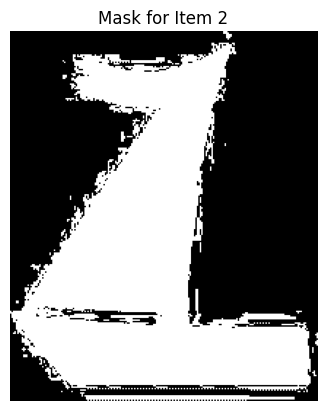

Result for item 4 saved to find/find_thresh0.5_4.jpg


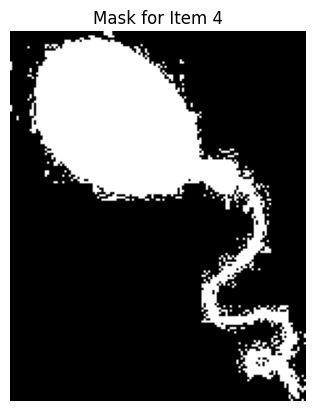

Result for item 8 saved to find/find_thresh0.5_8.jpg


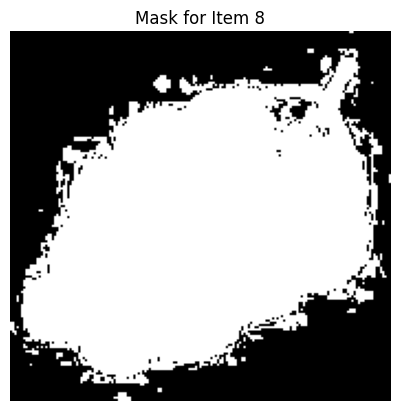

Result for item 10 saved to find/find_thresh0.5_10.jpg


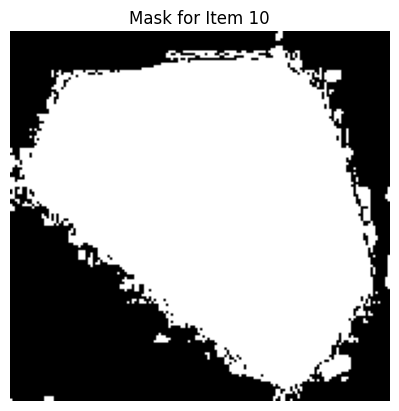

Result for item 11 saved to find/find_thresh0.5_11.jpg


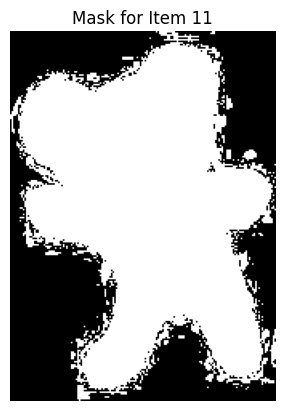

Result for item 12 saved to find/find_thresh0.5_12.jpg


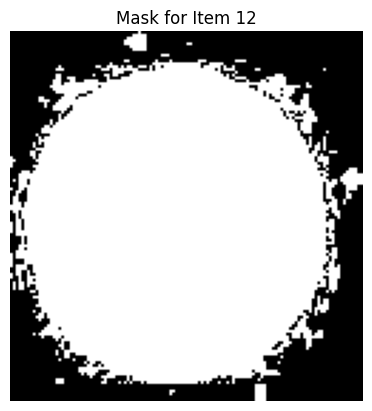

Result for item 15 saved to find/find_thresh0.5_15.jpg


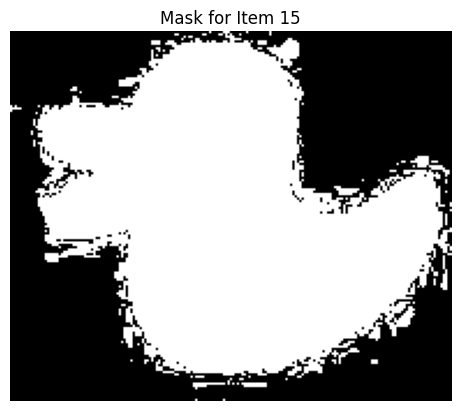

In [2]:
for i in [2,4,8,10,11,12,15]:
    matching(i, f"find_thresh0.5_{i}", thresh=0.5, scales=np.arange(0.25, 2.51, 0.01))

Found 8. The 2small circle in the picture is red stead of yellow, lowering the threshold to 0.5 made it acceptable. \
Also found 10, 11, 12, 15 here when the threshold is 0.5, maybe the reasons are from the mask and size scaling that have expanded the item mask, resulting in the object not being detected

# Now try finding item2 (the boat at the bottom of the picture)
I cropped out a new template for it, the template has no exceeding part below the boat

Result for item 22 saved to find/find_the_ship.jpg


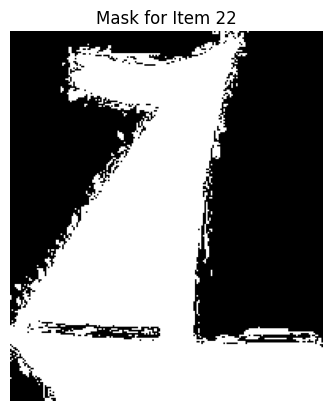

In [3]:
matching(22, "find_the_ship", thresh= 0.6, scales= np.arange(0.5, 2.01, 0.01))

Result for item 22 saved to find/find_the_ship_bigger.jpg


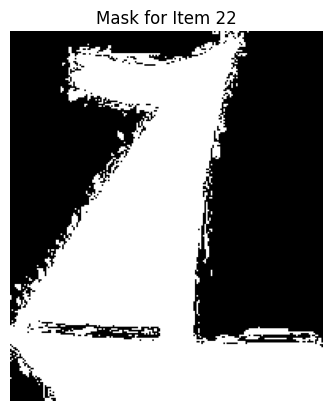

In [4]:
matching(22, "find_the_ship_bigger", thresh= 0.6, scales= np.arange(2.0, 4.01, 0.01))

Result for item 22 saved to find/find_the_ship.jpg


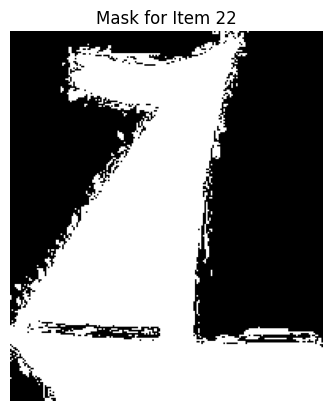

In [5]:
matching(22, "find_the_ship", thresh= 0.4, scales= np.arange(0.5, 2.01, 0.01))

# So only the balloon left

Result for item 4 saved to find/find_the_balloon.jpg


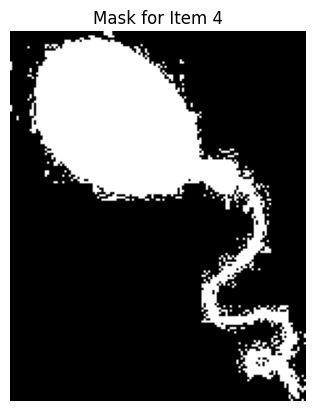

In [8]:
matching(4, "find_the_balloon", thresh= 0.5, scales= np.arange(0.5, 2.01, 0.01))